# Análise do componente principal (Principal Component Analysis - PCA)

Vamos discutir PCA! Uma vez que este não é exatamente um algoritmo de Machine Learning completo, mas apenas um algoritmo de aprendizagem não supervisionado.


Segundo Mingoti (2005) a técnica denominada de análise de componentes principais, popularmente chamada de PCA, foi introduzida por Karl Pearson em 1901 e está fundamentada no artigo de Hotelling de 1933. Seu objetivo principal é o de explicar a estrutura de variância e covariância de um vetor aleatório, composto de $p-variáveis$ aleatórias, a partir da construção de combinações lineares das variáveis originais. Estas combinações lineares são chamadas de componentes principais e são não correlacionadas entre si. Quando se tem $p-variáveis$ originais é possível obter-se $p$ componentes principais. No entanto, em geral deseja-se obter “redução do número de variáveis a serem avaliadas e interpretação das combinações lineares construídas”, ou seja, a informação contida nas $p-variáveis$ originais é substituída pela informação contida em $k (k < p)$ componentes principais não correlacionadas. Desta forma, o sistema de variabilidade do vetor aleatório composto das $p-variáveis$ originais é aproximado pelo sistema de variabilidade do vetor aleatório que contém as $k$ componentes principais. A qualidade da aproximação depende do número de componentes mantidas no sistema e pode ser medida a partir da avaliação da proporção de variância total explicada por essas.

Quando a distribuição de probabilidades do vetor aleatório em estudo é normal $p-variada$, as componentes principais, além de não correlacionadas, são independentes e têm distribuição normal. Entretanto, a suposição de normalidade não é requisito necessário para que a técnica de análise de componentes principais possa ser utilizada. A obtenção das componentes principais envolve a decomposição da matriz de covariâncias do vetor aleatório de interesse. Caso seja feita alguma transformação deste vetor aleatório, as componentes deverão ser determinadas utilizando-se a matriz de covariâncias relativa ao vetor transformado. 

Uma transformação muito usual é a **padronização das variáveis** do vetor pelas respectivas médias e desvios padrões, gerando-se novas variáveis centradas em zero e com variâncias iguais a 1. Neste caso, as componentes principais são determinadas a partir da matriz de covariâncias das variáveis originais padronizadas, o que é equivalente a extrair-se as componentes principais utilizando-se a matriz de correlação das variáveis originais.

Uma vez determinadas as componentes principais, os seus valores numéricos, denominados de escores, podem ser calculados para cada elemento amostral (instância). Deste modo, os valores de cada componente podem ser analisados, utilizando-se técnicas estatísticas usuais como análise de variância e análise de regressão, dentre outras.


## Atenção sobre o PCA

Lembre-se de que o PCA é apenas uma transformação dos seus dados e tenta descobrir quais recursos explicam a maior variação em seus dados. Por exemplo:

<img src='PCA.png' />

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Os dados
Vamos trabalhar com o conjunto de dados de câncer (*sklearn.datasets*), pois ele tem muitos atributos.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Visualização de PCA

Como discutimos anteriormente, é difícil visualizar dados com muitas dimensões. Podemos então utilizar o PCA para encontrar - por exemplo - os dois primeiros componentes principais e visualizar os dados neste novo espaço bidimensional, com um único espaço de dispersão. Antes de fazer isso, precisamos escalar nossos dados para que cada *feature* tenha uma variância unitária.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_data = scaler.transform(df)

O PCA com o Scikit Learn usa um processo muito semelhante a outras funções de pré-processamento que acompanham o SciKit Learn. Nós instanciamos um objeto PCA, localizamos os componentes principais usando o método de ajuste e, em seguida, aplicamos a rotação e a redução da dimensionalidade chamando transform().

Também podemos especificar quantos componentes queremos manter ao criar o objeto PCA.

In [11]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)

In [41]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Agora, podemos transformar esses dados em seus dois primeiros componentes principais.

In [42]:
x_pca = pca.transform(scaled_data)

In [43]:
scaled_data.shape

(569, 30)

In [50]:
x_pca.shape

(569, 2)

In [52]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Ótimo! Reduzimos 30 dimensões para apenas 2! Vamos oplotar essas duas dimensões.

Text(0, 0.5, 'Second Principal Component')

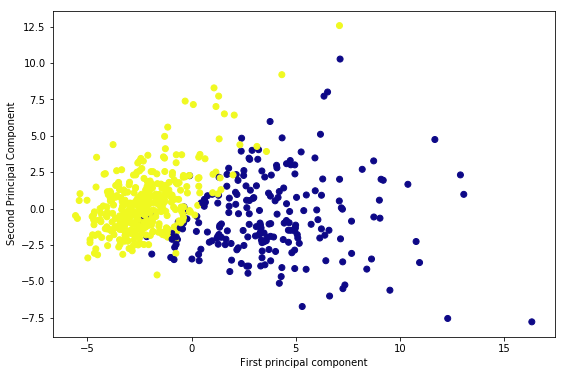

In [45]:
plt.figure(figsize=(9,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Claramente, usando esses dois componentes, podemos separar facilmente essas duas classes.

## Interpretando os componentes

Infelizmente, com este grande poder de redução da dimensionalidade, vem o custo de poder entender o que esses componentes representam.

Os componentes correspondem a combinações dos recursos originais. Os próprios componentes são armazenados como um atributo do objeto PCA ajustado:

In [46]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Nessa matriz numérica, cada linha representa um componente principal e cada coluna se relaciona com os recursos originais. podemos visualizar esta relação com um mapa de calor:

In [47]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [49]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


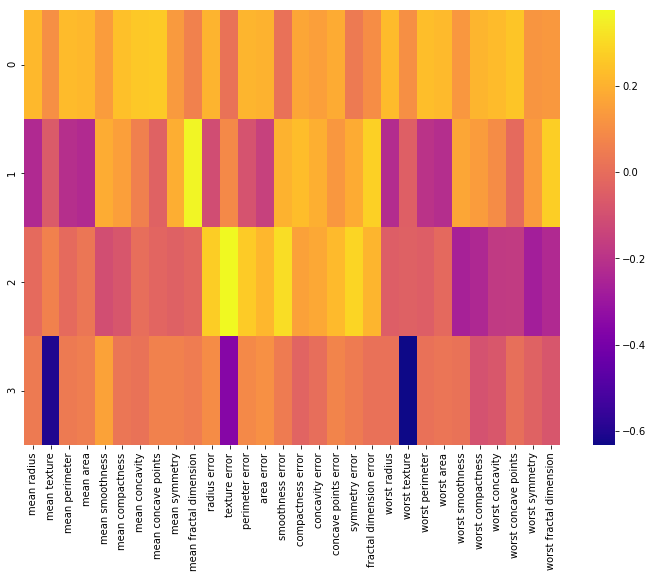

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df_comp,cmap='plasma',)